In [1]:
using CSV
using Plots

# Analysis
using GLM
using DataFrames
using Statistics
using StatsBase
using StatsPlots
using TimeSeries

In [2]:
# Loads Data
csv_file_path_mixing = "alpha0_Mixing_200loops/output_data.csv"
csv_file_path_mixing_DA = "alpha0_Mixing_DA_200loops/output_data.csv"
csv_file_path_random = "alpha0_Random_80loops/output_data.csv"
csv_file_path_random_DA = "alpha0_Random_DA_80loops/output_data.csv"
csv_file_path_vdisjoint = "alpha0_VDisjoint_200loops/output_data.csv"
csv_file_path_vdisjoint_DA = "alpha0_VDisjoint_DA_200loops/output_data.csv"

# Read the CSV file
data_mixing = CSV.File(csv_file_path_mixing, header=false) |> DataFrame
data_mixing_DA = CSV.File(csv_file_path_mixing_DA, header=false) |> DataFrame
data_random = CSV.File(csv_file_path_random, header=false) |> DataFrame
data_random_DA = CSV.File(csv_file_path_random_DA, header=false) |> DataFrame
data_vdisjoint = CSV.File(csv_file_path_vdisjoint, header=false) |> DataFrame
data_vdisjoint_DA = CSV.File(csv_file_path_vdisjoint_DA, header=false) |> DataFrame
;

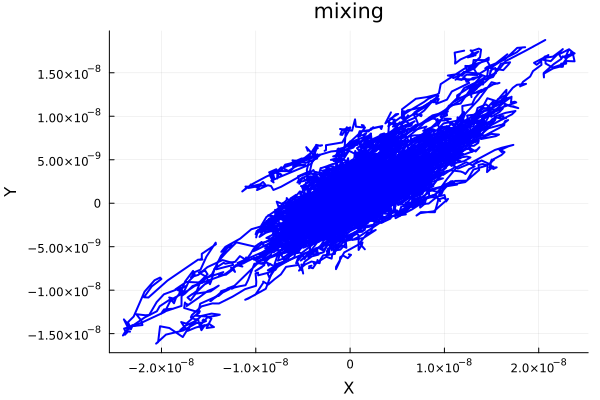

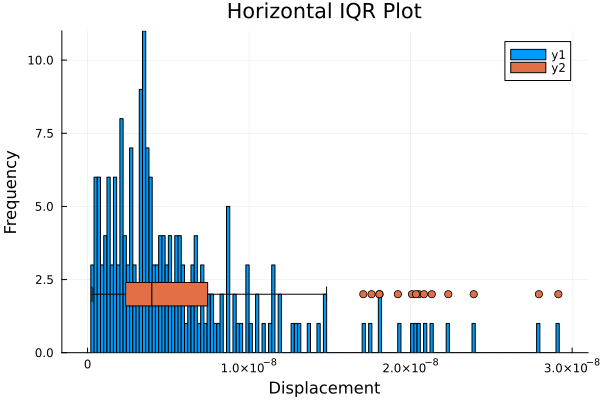

Mean: 5.870766286667603e-9
Median: 3.980067740501175e-9
25th Percentile: 2.3539915334438776e-9
75th Percentile: 7.4327600341865085e-9


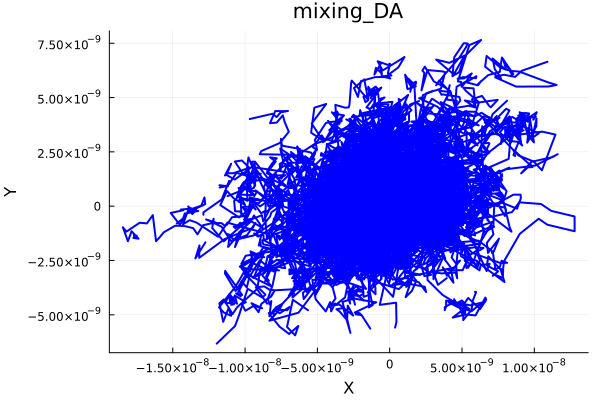

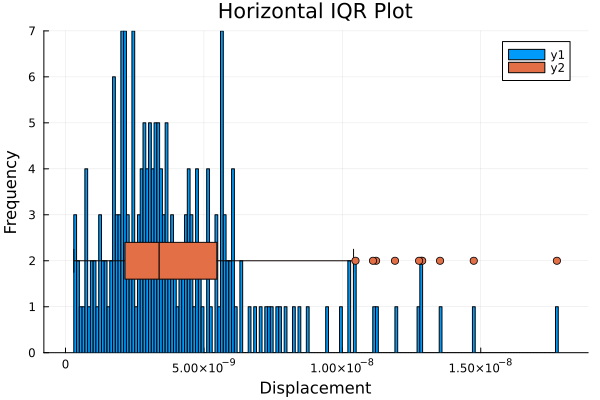

Mean: 4.147108562628744e-9
Median: 3.385916450835977e-9
25th Percentile: 2.1497470203070307e-9
75th Percentile: 5.4670033053481855e-9


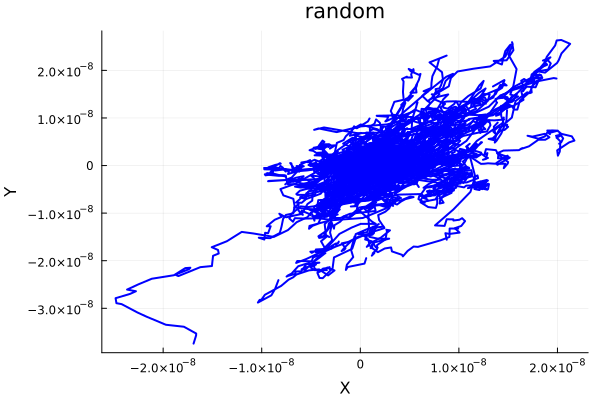

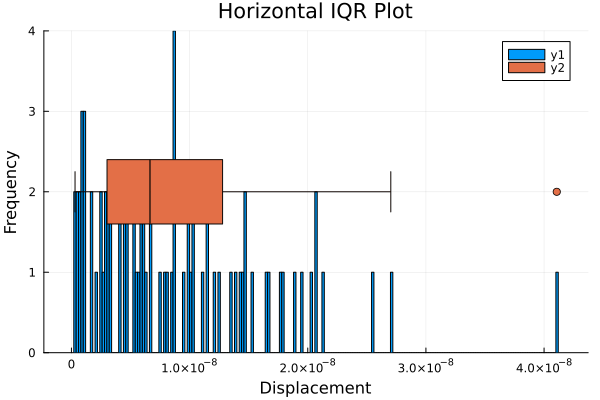

Mean: 8.786724908650444e-9
Median: 6.659816042725977e-9
25th Percentile: 3.0124555257108546e-9
75th Percentile: 1.2791223634546345e-8


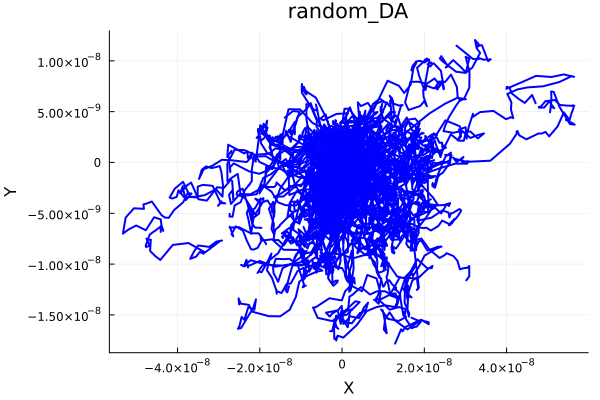

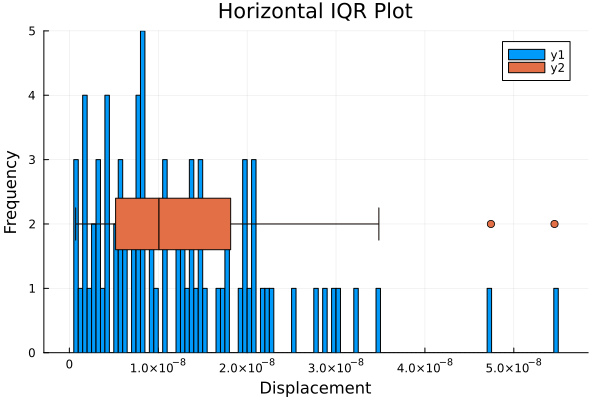

Mean: 1.277097896878754e-8
Median: 1.0083060874393873e-8
25th Percentile: 5.202248063026953e-9
75th Percentile: 1.8145498242202654e-8


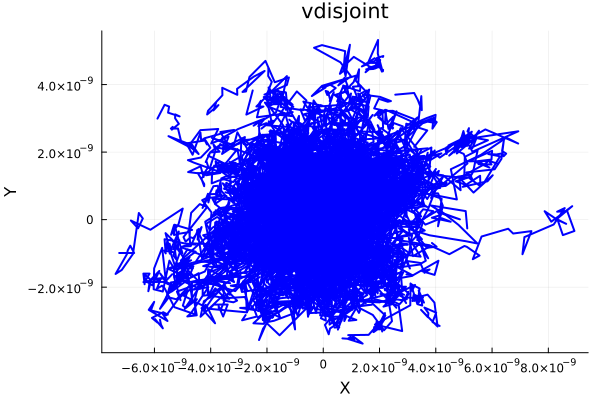

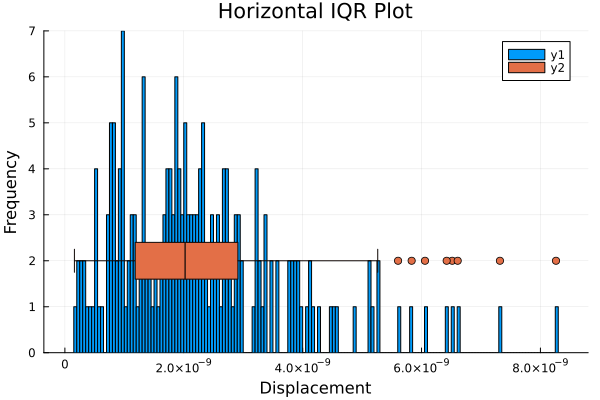

Mean: 2.2905560348872146e-9
Median: 2.0244267322516455e-9
25th Percentile: 1.1827977046056781e-9
75th Percentile: 2.91065324720349e-9


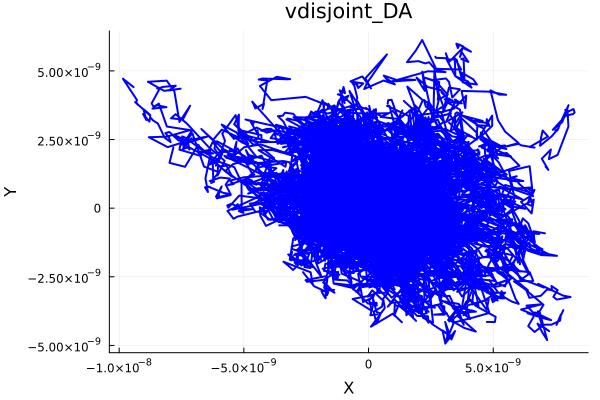

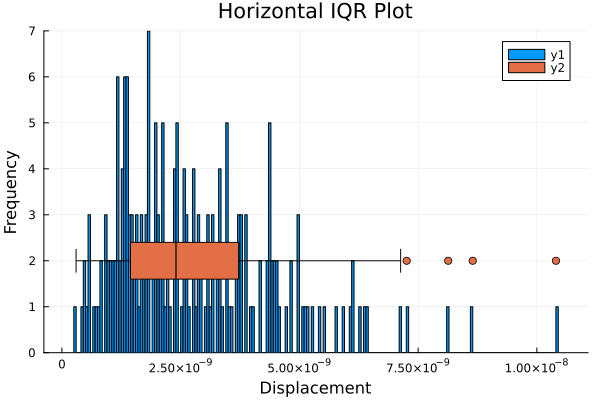

Mean: 2.7763787128967908e-9
Median: 2.4045071187704378e-9
25th Percentile: 1.4430602180119605e-9
75th Percentile: 3.72054927080239e-9


In [41]:
function PlotPath(data, plotName)
    cutoff = 100
    displacement = Vector{Float64}(undef, size(1:cutoff:size(data, 1)))

    # Initialize a plot with subplots
    p1 = plot(legend=false, xlabel="X", ylabel="Y", title=plotName)
    
    # Plot Trajectories
    for i in 1:cutoff:size(data, 1)
        # Extract the subset of data for the current simulation
        subset_data = data[i:i+cutoff-1, :]
        
        # Calculate cumulative sum for x and y
        x_cumsum = cumsum(subset_data[:, 1])
        y_cumsum = cumsum(subset_data[:, 2])
        
        # Plot the trajectory for the current simulation
        plot!(p1[1], x_cumsum, y_cumsum, label="", color=:blue, lw=2)

        # Plot Histogram
        quotient, remainder = divrem(i, cutoff)
        col_sum = [sum(skipmissing(subset_data.Column1)), sum(skipmissing(subset_data.Column2)), sum(skipmissing(subset_data.Column3))]
        displacement[quotient+1] = sqrt(col_sum[1]^2 + col_sum[2]^2)
    end
    
    p2 = histogram(displacement, bins=200, xlabel="Displacement", ylabel="Frequency", title="Displacement Histogram")

    # Calculate summary statistics
    mean_disp = mean(displacement)
    median_disp = median(displacement)
    q25, q75 = quantile(displacement, [0.25, 0.75])

    # Create a box-and-whisker plot
    boxplot!([displacement], seriestype=:box, orientation=:h, whisker_width=0.5, title="Horizontal IQR Plot", xlabel="Displacement")

    # Show the plot
    display(p1)
    display(p2)
    
    # Print and Plot summary statistics
    println("Mean: $mean_disp")
    println("Median: $median_disp")
    println("25th Percentile: $q25")
    println("75th Percentile: $q75")
    flush(stdout)  # Ensure println output is flushed
    
    # Save the plots
    # savefig(p1[1], plotName * "_path")
    # savefig(p1[2], plotName * "_histogram")
end

# Example Usage
PlotPath(data_mixing, "mixing")
PlotPath(data_mixing_DA, "mixing_DA")
PlotPath(data_random, "random")
PlotPath(data_random_DA, "random_DA")
PlotPath(data_vdisjoint, "vdisjoint")
PlotPath(data_vdisjoint_DA, "vdisjoint_DA")

1. angle
2. pick best setup.
3. Try diff SA density
4. Try diff antibody with diff diffusion